## Exploratory Data Analysis of IMDb dataset
* Data sets found at https://datasets.imdbws.com/
* Description of datasets found here imdb.com/interfaces


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Statistics for titles.ratings.tsv


Sample of titles.ratings.tsv dataset: 

 <bound method NDFrame.head of             tconst  averageRating  numVotes
0        tt0000001            5.7      1913
1        tt0000002            5.8       258
2        tt0000003            6.5      1719
3        tt0000004            5.6       170
4        tt0000005            6.2      2534
...            ...            ...       ...
1262415  tt9916690            6.5         6
1262416  tt9916720            5.3       260
1262417  tt9916730            8.4         6
1262418  tt9916766            6.8        21
1262419  tt9916778            7.2        35

[1262420 rows x 3 columns]>

Statistics for titles.ratings.tsv: 

       averageRating    numVotes
count    1262420.00  1262420.00
mean           6.91     1018.32
std            1.39    17054.37
min            1.00        5.00
25%            6.20       11.00
50%            7.10       25.00
75%            7.90       97.00
max           10.00  2644764.00


<Figure size 864x432 with 0 Axes>

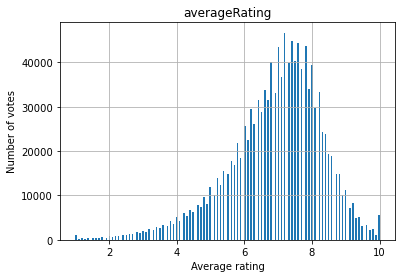

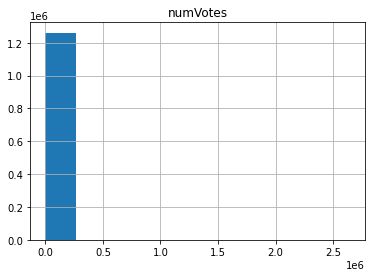

mode is:     averageRating  numVotes
0            7.2         7 


mean is:  averageRating       6.913012
numVotes         1018.315841
dtype: float64 




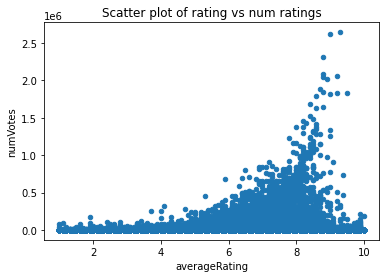

In [5]:
df = pd.read_csv('titles.ratings.tsv', sep='\t')

print("\nSample of titles.ratings.tsv dataset: \n\n", df.head)


# This shows percentiles, mean, sd, min, max and format to show 2 dec places
print("\nStatistics for titles.ratings.tsv: \n\n", df.describe().apply(lambda s: s.apply('{0:.2f}'.format)))

# This shows no missing values
#print("df.insnull().sum() : ", df.isnull().sum())

#print("df.memory_usage() : ", df.memory_usage())


# Create basic histogram
fig = plt.figure(figsize=(12, 6))
df.hist(column='averageRating', bins=200)
plt.xlabel('Average rating')
plt.ylabel('Number of votes')
plt.show()

# trying to plot numVotes as a histogram doesn't really show well. --> FIX THIS!
df.hist(column='numVotes')
plt.show()

# find mode of averageRating
print("mode is: ", df.mode(numeric_only=True), "\n\n")

# find mean of averageRating
print("mean is: ", df.mean(numeric_only=True), "\n\n")

# find top 20 movies by num of ratings
df.nlargest(20, 'numVotes')

# Scatter plot of averageRating vs numVotes
df.plot(title="Scatter plot of rating vs num ratings", kind='scatter', x ='averageRating', y='numVotes')
plt.show()


Sample of names.basics.tsv dataset: 

 <bound method NDFrame.head of            nconst         primaryName birthYear deathYear  \
0       nm0000001        Fred Astaire      1899      1987   
1       nm0000002       Lauren Bacall      1924      2014   
2       nm0000003     Brigitte Bardot      1934        \N   
3       nm0000004        John Belushi      1949      1982   
4       nm0000005      Ingmar Bergman      1918      2007   
...           ...                 ...       ...       ...   
133768  nm0140582    Marty Carrington        \N        \N   
133769  nm0140583  Michael Carrington        \N        \N   
133770  nm0140584   Murray Carrington      1885      1941   
133771  nm0140585    Nigel Carrington        \N        \N   
133772  nm0140586  Phyllis Carrington        \N        \N   

                           primaryProfession  \
0             soundtrack,actor,miscellaneous   
1                         actress,soundtrack   
2        actress,soundtrack,music_department   
3    

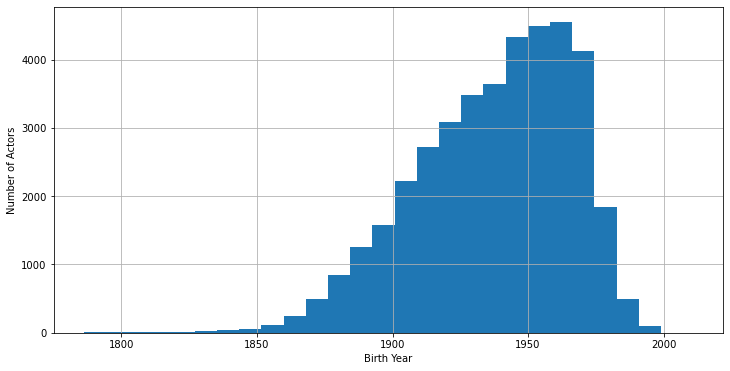

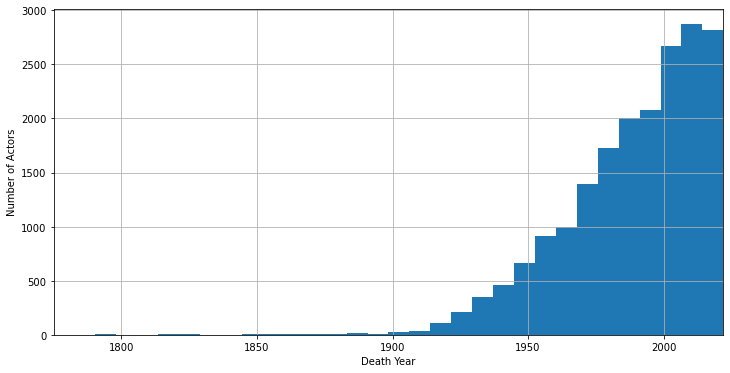

In [6]:
df1 = pd.read_csv('names.basics.tsv', sep='\t')

print("\nSample of names.basics.tsv dataset: \n\n", df1.head)

print("\nStatistics for titles.ratings.tsv: \n\n", df1.describe())

# drop rows where birthYear is /N
df1.drop(df1[df1['birthYear'] == r'\N'].index, inplace = True)
# convert birthYear column from type object to type numeric
df2 = pd.to_numeric(df1['birthYear'])
# Make histogram of actor birthYear
fig = plt.figure(figsize=(12, 6))
df2.hist(bins=100)
plt.xlabel('Birth Year')
plt.ylabel('Number of Actors')
plt.xlim([1775, 2022])
plt.show()


# drop rows where deathYear is /N
df1.drop(df1[df1['deathYear'] == r'\N'].index, inplace = True)
# convert birthYear column from type object to type numeric
df2 = pd.to_numeric(df1['deathYear'])
# Make histogram of actor deathYear
fig = plt.figure(figsize=(12, 6))
df2.hist(bins=100)
plt.xlabel('Death Year')
plt.ylabel('Number of Actors')
plt.xlim([1775, 2022])
plt.show()

## Barchart of types of media in IMDb dataset and their count
* (barchart used because piechart is too crowded to show smallest segments)

<AxesSubplot:title={'center':'Types of Media and Their Count'}>

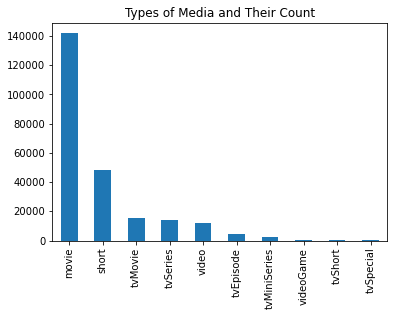

In [8]:
# show dataset size, do a pie chart on the media types, 
# do a kde plot on movie year, etc. 
df = pd.read_csv('title.basics.tsv', sep='\t')

fig, ax = plt.subplots()
df['titleType'].value_counts().plot(title='Types of Media and Their Count',ax=ax, kind='bar')

# Piechart is commented out because it looks bad
#df['titleType'].value_counts().plot(ax=ax, kind='pie')